In [11]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
import urllib
import matplotlib.cm as cm

In [2]:
# download pre-trained u-net model from torch
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

Using cache found in /home/ubuntu/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


Text(0.5, 1.0, 'Output segmentation')

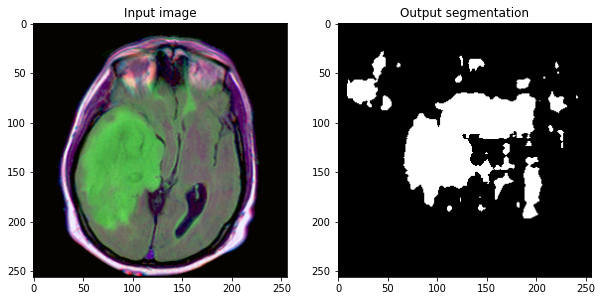

In [25]:
# Download an example image and test

url, filename = ("https://github.com/mateuszbuda/brain-segmentation-pytorch/raw/master/assets/TCGA_CS_4944.png", "TCGA_CS_4944.png")
try: 
    urllib.URLopener().retrieve(url, filename)
except: 
    urllib.request.urlretrieve(url, filename)

# Test segmentation with example image
input_image = Image.open(filename)
m, s = np.mean(input_image, axis=(0, 1)), np.std(input_image, axis=(0, 1))
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=m, std=s),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model = model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

output_mask = torch.round(output[0]).cpu().numpy()[0,:,:]
    
#visualize if the label is adapted what we want
fig,axs = plt.subplots(1, 2, figsize = (10,5))
axs[0].imshow(input_image, cmap=cm.gray)
axs[0].set_title("Input image")
axs[1].imshow(output_mask, cmap=cm.gray)
axs[1].set_title("Output segmentation")

In [17]:
mask = torch.round(output[0])

In [21]:
cpu_tensor = mask.cpu().numpy()

In [22]:
cpu_tensor

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)